## SME0823 - Modelos de Regressão e Aprendizado Supervisionado II

### Avaliação 2

### Aluno: Renan Correia Monteiro Soares - 14605661

### Prof. Cibele Russo


Um estudo clínico busca investigar fatores associados ao número de espirros diários apresentados por indivíduos com rinite alérgica no período em que as plantas mais liberam o pólen no ar. Para cada participante, foram coletadas as seguintes variáveis:

* **nsneeze**: número de espirros observados em um dia (variável resposta de contagem).
* **alcohol**: consumo de bebida alcoólica nas 24 horas anteriores (0 = não, 1 = sim).
* **antihist**: uso de anti-histamínico no dia da observação (0 = não, 1 = sim).
* **smoker**: indicador de tabagismo (0 = não fumante, 1 = fumante).
* **age**: idade do paciente (anos).
* **pollen**: índice quantitativo de concentração de pólen no ar no dia da observação.


**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.

**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.

**3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


**6.** Separe os dados em dois subconjuntos, treinamento com 80% das observações e
teste com 20%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (deviance, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).


**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.


Utilize os códigos abaixo para iniciar suas análises.

Atenção: Se seu número USP

- termina com 0 ou 1, utilize os dados sneeze1
- termina com 2 ou 3, utilize os dados sneeze2
- termina com 4 ou 5, utilize os dados sneeze3
- termina com 6 ou 7, utilize os dados sneeze4
- termina com 8 ou 9, utilize os dados sneeze5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

df = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Datasets/refs/heads/main/sneeze1.csv')
df = df.iloc[:, 1:]

df

,nsneeze,alcohol,antihist,smoker,age,pollen
0,6,0,1,1,80.0,43.279066
1,5,1,0,0,46.0,61.571050
2,0,0,1,0,20.0,24.281061
3,18,0,0,1,27.0,59.588401
4,5,0,0,0,48.0,32.727172
...,...,...,...,...,...,...
1195,72,0,0,1,51.0,110.470695
1196,6,0,0,0,65.0,45.704558
1197,8,0,0,0,59.0,20.381291
1198,31,0,0,1,20.0,31.376729


In [2]:
df.columns

Index(['nsneeze', 'alcohol', 'antihist', 'smoker', 'age', 'pollen'], dtype='object')

## 1.

**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.


[]

<Figure size 1200x1000 with 0 Axes>

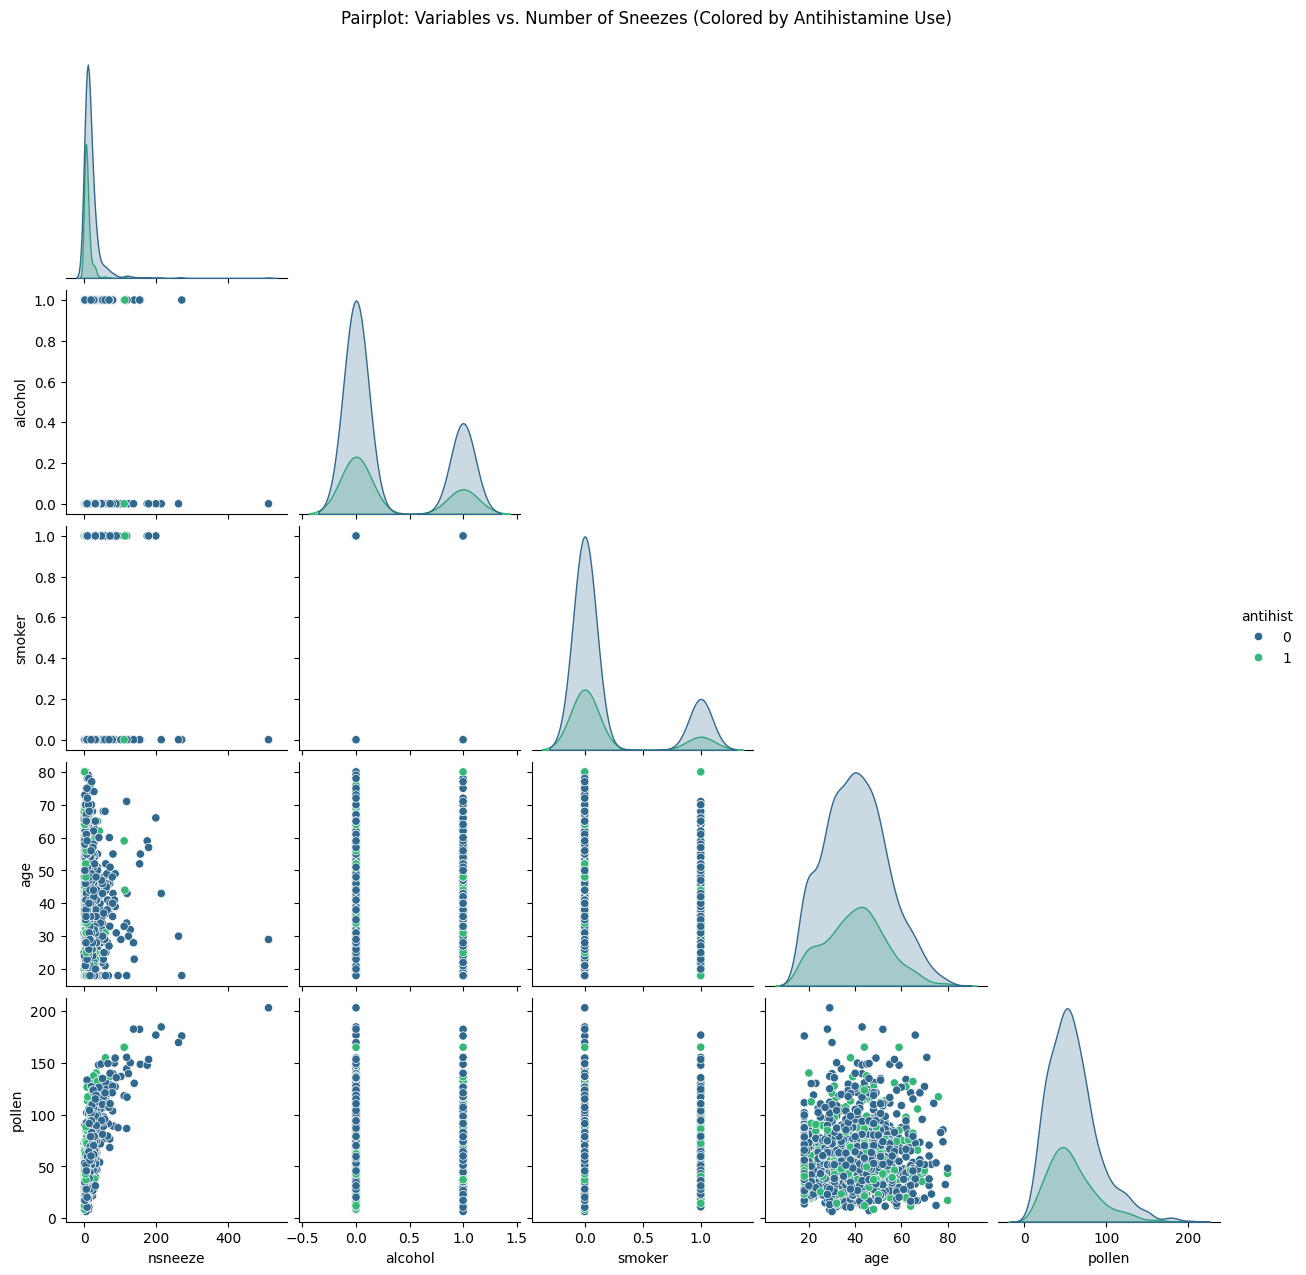

In [ ]:
#Pritando pairplot
plt.figure(figsize=(12, 10))
pairplot = sns.pairplot(df, hue='antihist', diag_kind='kde', corner=True, palette='viridis')
pairplot.fig.suptitle('Pairplot: Variables vs. Number of Sneezes (Colored by Antihistamine Use)', y=1.02)
plt.plot()

**Interpretação do pairplot**: Focando primeiramente na análise da distribuição das variáveis, percebe-se que as variáveis "póllen", "age" e "sneeze seguem uma distribuição que pode ser considerada normal e, ainda, percebe-se (por causa da variável hue="antihist"), que a utilizaçao de antihistamínicos está associada a uma pequena diminuição no número de espirros em um dia ("sneeze"). Além disso, destaca-se que as variáveis binárias "alcohol" e "smoker" apresentam uma maior concentração de "negativos" do que "positivos" e, considerando a variável "antihist", observa-se que há um maior número de pessoas que não usam histamínico em relação aos que usam.
Além disso, percebe-se uma correlação aparente entre "pollen" e "nsneeze" o que está de acordo com o que é esperado pela natureza do problema.

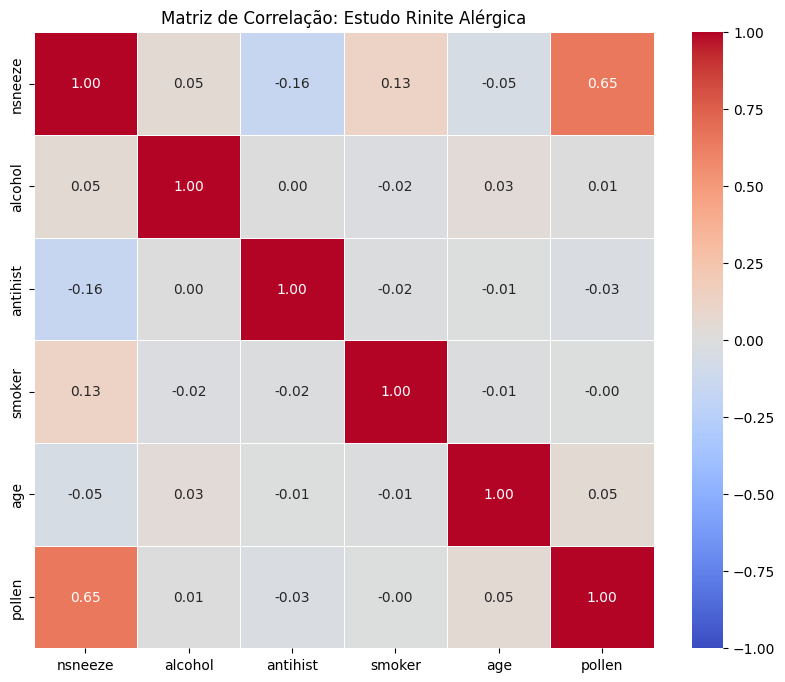

In [ ]:
#Gerando matriz de correlação
corr_matrix = df.corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            annot=True,       # Escreve o valor dentro do quadrado
            fmt=".2f",        # Formatação para 2 casas decimais
            cmap='coolwarm',  # Cores: Vermelho (+) e Azul (-)
            vmin=-1, vmax=1,  # Garante que a escala de cor vá de -1 a 1
            linewidths=0.5)

plt.title('Matriz de Correlação')
plt.show()

**Interpretação da matiz de correlações:** O que mais se destaca no gráfico é a correlação moderada entre "pollen" e "nsneeze" (0.65) que, por sua vez, já é esperada visto a natureza do problema estudado. \
Além disso, destaca-se também a correlacão entre "nsneeze" e "smoker" e também entre "nsneeze" e "antihist". A primeira é positiva e, embora muito baixa (0.13 não é considerada nem correlação fraca), pode-se dizer que o ato de fumar está bem fracamente relacionado com o número de espirros por dia e, no contexto do problema, é uma correlação não trivial que possui grande riqueza estatística. A segunda segue o mesmo raciocínio, porém como o sinal é negativo, associa-se que o uso de antihistamínico está bem levemente associado à diminuição de número de espirros por dia, o que, de certa maneira, é uma correlação mais fraca do que esperada segundo o contexto do problema (como antihistamínico é um antialérgico, é razoável considerar que a correlação deveria ser mais forte).

## 2.

**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.


In [5]:
resposta = df['nsneeze']
preditoras = df[['alcohol', 'antihist', 'smoker', 'age', 'pollen']]

In [6]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [7]:
formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

modelo_pois = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.Poisson()
)

ajuste_pois = modelo_pois.fit()
print(ajuste_pois.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                 1200
Model:                            GLM   Df Residuals:                     1194
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4947.1
Date:                Wed, 03 Dec 2025   Deviance:                       4949.1
Time:                        16:01:17   Pearson chi2:                 5.04e+03
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.5560      0.026  

**Interpretação da significância estatística:** Percebe-se que todos os p-valores são 0.000, logo, todas as variáveis possuem relevância estatística para o modelo.

**Interpretação dos coeficientes:** Como usou-se a função poisson com função de ligação log, pode-se exponenciar o coeficiente de forma a obtermos a razão de chances associada a cada preditora:

1. **Intercept:** \
A exponencial do coeficiente representa o número médio de espirros esperados para um indivíduo de referência (não bebe alcool, nao usa histamínico, não fuma, tem 0 anos e não inalou pólen): Como $ e^{1.5560} = 4.74 $, o modelo prevê um valor base de 4.74 espirros.
2. **C(alcohol):** \
A exponencial do coeficiente representa o aumento causado pela ingestão de álcool na últimas 24 horas na quantidade de espirros no dia. Como $e^{0.2191} = 1.24$, o modelo prevê que a ingestão de álcool no dia anterior aumenta o número de espirros médio em cerca de 24%.
3. **C(antihist):** \
A exponencial do coeficiente representa o aumento/diminuição causado pela ingestão de antihistamínicos nas últimas 24 horas na quantidade de espirros no dia. Como $e^{-0.6449} =0.525$, o modelo prevê que a ingestão de antihistamínico diminui o número de espirros médio em cerca de 47.5%.
4. **C(smoker):** \
A exponencial do coeficiente representa o aumento causado pela ação de fumar na últimas 24 horas na quantidade média de espirros no dia. Como $e^{0.4639} = 1.59$, o modelo prevê que indivíduos fumantes apresentam, em média, 59% mais espirros do que não fumantes.
5. **pollen:** \
A exponencial do coeficiente representa o aumento causado pelo aumento da concentração de póllen na quantidade média de espirros no dia. Como $e^{0.029} = 1.023$, o modelo prevê que para cada 1 unidade de aumento no índice de concentração de pólen, o número esperado de espirros aumenta em aproximadamente 2,3%. Assim, um aumento de 50 unidades no pólen (comum em dias críticos) implicaria num aumento de $e^{0.0229 \times 50} \approx 3.14$, ou seja, mais que triplicaria os espirros.
6. **age:** \
A exponencial do coeficiente representa o aumento causa pela ingestão de álcool na últimas 24 horas na quantidade de espirros no dia. Como $e^{-0.0114} = 0.989$, o modelo prevê que para cada ano adicional de vida, o número esperado de espirros reduz-se em cerca de 1,1%. Pacientes mais velhos tendem a apresentar sintomas ligeiramente menores neste conjunto de dados.

## 3.


**3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


**Estatística de teste qui-quadrado:**

In [8]:
# estatística de teste qui-quadrado
pearson_chi2 = ajuste_pois.pearson_chi2
df_resid = ajuste_pois.df_resid          

phi = pearson_chi2 / df_resid

print(f"Estatística Qui-Quadrado de Pearson: {pearson_chi2:.2f}")
print(f"Graus de Liberdade Residuais: {df_resid}")
print(f"Parâmetro de Dispersão (Phi): {phi:.4f}")

Estatística Qui-Quadrado de Pearson: 5036.85
Graus de Liberdade Residuais: 1194
Parâmetro de Dispersão (Phi): 4.2185


**Interpretação da estatística de teste qui-quadrado:** \
O valor de $4.22$ é muito superior a $1$. Isso indica que a variância dos dados é mais de 4 vezes maior do que a média predita pelo modelo. É um forte indicativo de superdispersão.

**Estatística de teste de Cameron & Trivedi**

In [9]:
# Teste de Cameron & Trivedi
mu_hat = ajuste_pois.predict()
y = df['nsneeze']
z = ((y - mu_hat)**2 - y) / mu_hat

ols_test = sm.OLS(z, mu_hat).fit()

print(f"Estatística t do Teste de Cameron & Trivedi: {ols_test.tvalues[0]:.4f}")
print(f"P-valor do Teste: {ols_test.pvalues[0]:.4e}")

Estatística t do Teste de Cameron & Trivedi: 19.1205
P-valor do Teste: 2.4283e-71


C:\Users\Renan\AppData\Local\Temp\ipykernel_16264\133470927.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Estatística t do Teste de Cameron & Trivedi: {ols_test.tvalues[0]:.4f}")
C:\Users\Renan\AppData\Local\Temp\ipykernel_16264\133470927.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"P-valor do Teste: {ols_test.pvalues[0]:.4e}")


**Interpretação da estatística de regressão auxiliar(Cameron & Trivedi):** \
Rejeitamos fortemente a hipótese nula de que a variância é igual à média ($H_0$). Há evidência estatística robusta de superdispersão.

In [10]:
def envelope_poisson(fitted_model, X, title):
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    sim_resid = []
    for _ in range(100):
        mu_sim = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
        y_sim = np.random.poisson(mu_sim)
        sim_model = sm.GLM(y_sim, X, family=sm.families.Poisson()).fit()
        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, 'o', label="Resíduos observados")
    plt.plot(lower, 'r--', linewidth=1, label="banda 2.5%")
    plt.plot(upper, 'r--', linewidth=1, label="banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)

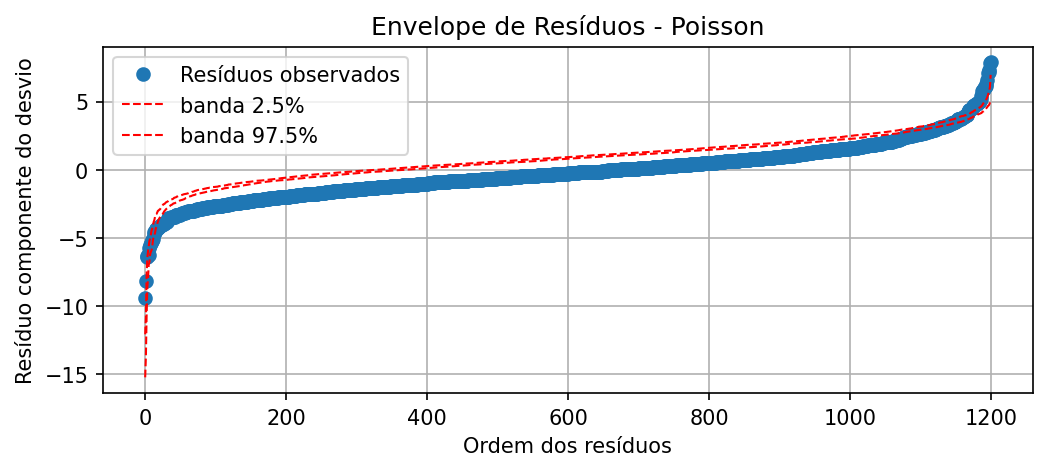

In [11]:
results = ajuste_pois
X = preditoras
plt.figure(figsize=(8, 3), dpi=150)
envelope_poisson(results, X, "Envelope de Resíduos - Poisson")

**Interpretação do gráfico de envelope dos resíduos:**
Observa-se uma quantidade enorme de pontos azuis está fora das faixas vermelhas. Isso indica que a distribuição dos resíduos reais é muito diferente da distribuição teórica que o modelo de Poisson espera. Indicando, novamente, superdispersão dos dados.

## 4

**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


In [12]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

alpha_fixado = 0.2

#alpha para sneeze1 a sneeze5 = 0.23, 0.3, 0.25,  0.2, 0.2

modelo_nb = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.NegativeBinomial(alpha=alpha_fixado)
)

ajuste_nb = modelo_nb.fit()
print(ajuste_nb.summary())

alpha_usado = ajuste_nb.family.alpha
print("Alpha usado no modelo:", alpha_usado)

alpha_est = ajuste_nb.params.iloc[-1]
print("Alpha estimado:", alpha_est)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                 1200
Model:                            GLM   Df Residuals:                     1194
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3847.2
Date:                Wed, 03 Dec 2025   Deviance:                       1288.8
Time:                        16:01:17   Pearson chi2:                 1.24e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9451
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.5615      0.059  

**Tabela de métricas entre modelo Poisson e binomial negativa:**

In [14]:
metrics = pd.DataFrame({
    'Métrica': ['AIC', 'Deviance', 'Log-Likelihood', 'Df Residuals'],
    'Poisson': [ajuste_pois.aic, ajuste_pois.deviance, ajuste_pois.llf, ajuste_pois.df_resid],
    'Binomial Negativo': [ajuste_nb.aic, ajuste_nb.deviance, ajuste_nb.llf, ajuste_nb.df_resid]
})

print("TABELA COMPARATIVA:")
print(metrics)

TABELA COMPARATIVA:
          Métrica      Poisson  Binomial Negativo
0             AIC  9906.278039        7706.376159
1        Deviance  4949.108384        1288.848137
2  Log-Likelihood -4947.139020       -3847.188080
3    Df Residuals  1194.000000        1194.000000


**Interpretação da tabela de métricas entre modelo Poisson e binomial negativa:** \
Esta tabela fornece evidências estatísticas contundentes de que o Modelo Binomial Negativo é muito superior ao modelo de Poisson para os seus dados.
Analisando o Deviance (Desvio) percebe-se que o modelo binomial negativo possui um valor bem menor comparada ao modelo Poisson. Aprofundando a análise, utiliza-se que a razão entre o desvio e o número de graus de liberdade deve ser o mais próxima de 1 possível; Nesse sentido, o modelo binomial negativo apresenta esse valor como $1288 / 1194 \approx \mathbf{1.08}$, enquanto o modelo poisson possui $4949 / 1194 \approx \mathbf{4.14}$.

Além disso, o AIC do modelo binomial negativo ser menor que o do modelo de Poisson indica um melhor equilíbrio entre a qualidade do ajuste e a simplicidade do modelo binomial negativo.

Por fim, o log-likelihood indica que os dados reais são muito mais "prováveis" de existir sob as regras da distribuição Binomial Negativa do que sob a Poisson.

In [15]:
def envelope_negbin(fitted_model, title):
    # resíduos observados
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    # matriz de design e parâmetros do próprio modelo
    X = fitted_model.model.exog
    mu = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
    alpha = fitted_model.family.alpha

    sim_resid = []
    for _ in range(100):
        # simula Y ~ NB(mu, alpha) com a mesma parametrização
        n_sim = 1 / alpha
        p_sim = n_sim / (n_sim + mu)
        y_sim = np.random.negative_binomial(n=n_sim, p=p_sim)

        sim_model = sm.GLM(
            y_sim,
            X,
            family=sm.families.NegativeBinomial(alpha=alpha)
        ).fit()

        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, "o", label="Resíduos observados")
    plt.plot(lower, "r--", linewidth=1, label="banda 2.5%")
    plt.plot(upper, "r--", linewidth=1, label="banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)


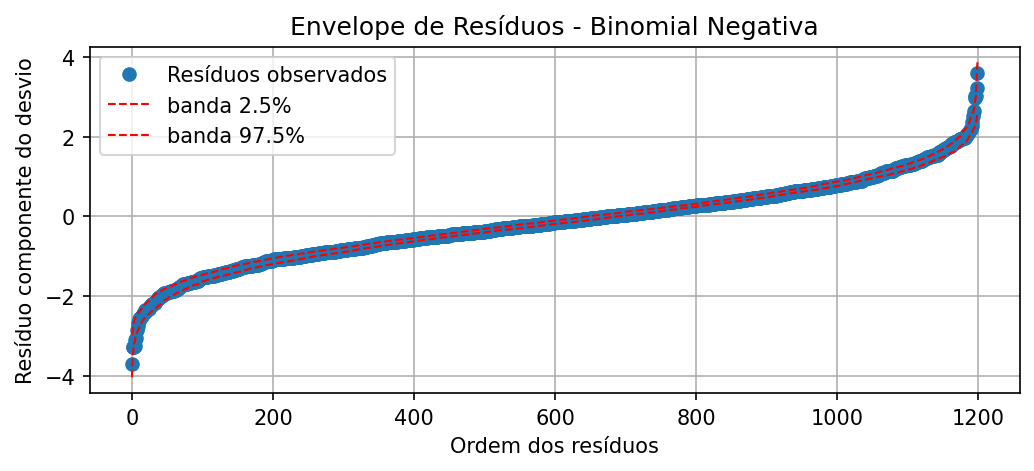

In [16]:
results_nb = ajuste_nb

plt.figure(figsize=(8, 3), dpi=150)
envelope_negbin(results_nb, "Envelope de Resíduos - Binomial Negativa")

**Interpretação do gráfico envelope de resíduos para o modelo binomial negativo:** \
Ao analisar do gráfico, visualmente percebemos que os pontos azuis (resíduos) estão em sua grande parte dentro do envelope ao contrário do que foi observado no gráfico do envelope para o modelo Poisson. \
Concluindo, o modelo de Poisson apresentou forte superdispersão, indicando que os erros padrão das estimativas estariam subestimados (falsamente precisos). O modelo Binomial Negativo corrigiu essa dispersão e apresentou um ajuste significativamente superior (redução de AIC > 2000), sendo, portanto, o modelo escolhido para descrever os fatores associados ao número de espirros.

## 5. 



**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


In [17]:
margeff = ajuste_nb.get_margeff(at='overall', dummy=True)

print(margeff.summary())

         GLM Marginal Effects        
Dep. Variable:                nsneeze
Method:                          dydx
At:                           overall
                      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
C(alcohol)[T.1]      3.7991      0.636      5.977      0.000       2.553       5.045
C(antihist)[T.1]    -9.3670      0.496    -18.891      0.000     -10.339      -8.395
C(smoker)[T.1]       9.6819      0.906     10.688      0.000       7.906      11.457
age                 -0.1852      0.021     -8.801      0.000      -0.226      -0.144
pollen               0.3843      0.015     25.983      0.000       0.355       0.413


**Interpretação do consumo de álcool(alcohol) sobre o número médio de espirros:** \
A partir da tabela, percebe-se que o consumo de álcool aumenta em 3,8 o número de espirros diários, em média. O que implica que o consumo de álcool piora o quadro clínico. 

Além disso, o modelo calcula que o uso de antihistamínico diminui em 9 o número de espirros, em média. O que reforça sua eficácia na atenuação da resposta alérgica.

## 6.

**6.** Separe os dados em dois subconjuntos, treinamento com 80% das observações e
teste com 20%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (desvio, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).



In [18]:
# Split 70/30
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
train_df, test_df = train_test_split(df, test_size=0.30, random_state=42)
print(f"Observações no Treino: {len(train_df)}")
print(f"Observações no Teste: {len(test_df)}")


Observações no Treino: 840
Observações no Teste: 360


In [19]:
formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"
pois_tr = smf.glm(formula=formula, data=train_df, family=sm.families.Poisson()).fit()
nb_tr = smf.glm(formula=formula, data=train_df, family=sm.families.NegativeBinomial(alpha=alpha_fixado)).fit()

In [20]:
def calcular_metricas(y_true, y_pred, modelo_nome):
    eqm = mean_squared_error(y_true, y_pred)
    eam = mean_absolute_error(y_true, y_pred)
    return pd.Series({'EQM': eqm, 'EAM': eam}, name=modelo_nome)

y_real = test_df['nsneeze']
res_pois = calcular_metricas(y_real, pois_tr.predict(test_df), 'Poisson')
res_nb = calcular_metricas(y_real, nb_tr.predict(test_df), 'Binomial Negativo')

# Exibindo Resultados
comparacao = pd.concat([res_pois, res_nb], axis=1)
print("\n--- Desempenho Preditivo (Fora da Amostra) ---")
print(comparacao)


--- Desempenho Preditivo (Fora da Amostra) ---
        Poisson  Binomial Negativo
EQM  230.439687         240.306402
EAM    7.255887           7.271385


Menores MSE/MAE indicam melhor performance preditiva.


**Interpretação das métricas:** \
Ao analisar as métricas, percebe-se que o modelo de Poisson apresenta um desempenho levemente melhor que o modelo binomial negativo. Isto significa que, nos dados de teste, o modelo de Poisson prediz melhor o número de espirros diários (nsneeze), em média, do que o modelo binomial negativo. \ 



In [21]:
print('AIC treino Poisson', pois_tr.aic)
print('AIC treino NegBin', nb_tr.aic)

AIC treino Poisson 6775.264606000614
AIC treino NegBin 5359.194440097786


**Interpretação de AIC:** \
Os dados indicam que o modelo binomial negativo apresenta um melhor equilíbro entre simplicidade e complexidade para explicar os dados.

**Comparação entre os modelos de Poisson e Binomial Negativo segundo essas novas métricas:** 
As conclusões baseadas em critérios de ajuste (AIC e Deviance) e nas métricas prediticas (EQM e EAM) aparentemente são paradoxais. Para explicar isso, pode-se que tanto o modelo binomial negativo quanto o poisson acertaram, de forma semelhante, a média dos dados de amostra. Entretanto, o modelo de Poisson não conseguiu capturar a variância dos dados de teste (superdispersão). Nesse sentido, essa é uma explicação satisfatória para explicar o porquê do modelo Poisson ser ligeiramenete mais adequado para predições do que o modelo binomial negativo.

Por fim, conclui-se que para fins de predição, o modelo Poisson é mais adequando, enquanto para fins de inferência, o modelo binomial seja mais adequado.

## 7. 

**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.

**Escolha do modelo:**
Apesar do modelo Poisson ser levemente mais adequado para predições de acordo com o que foi feito no item 6, escolheu-se usar o modelo binomial negativo por causa dos resultados observados no item 3.

A diferença no valor do EQM e AEM para os dois modelos são praticamente irrelevantes(EQM = 230 para Poisson e EQM = 240 para Binomial negativo), enquanto o que foi observado no gráfico de envelopes de resíduos para ambos os modelos e na métrica de AIC não pode ser ignorado (superdispersão no modelo Poisson).

In [22]:
# Previsões perfis A e B usando modelo binomial negativo
low_pollen = df['pollen'].quantile(0.10)
high_pollen = df['pollen'].quantile(0.90)
perfil_A = pd.DataFrame({'alcohol':[0],'antihist':[1],'smoker':[0],'age':[30],'pollen':[low_pollen]})
perfil_B = pd.DataFrame({'alcohol':[1],'antihist':[0],'smoker':[1],'age':[50],'pollen':[high_pollen]})
prev_A_nb = ajuste_nb.predict(perfil_A)[0]
prev_B_nb = ajuste_nb.predict(perfil_B)[0]
print(f'Perfil A (NB): {prev_A_nb:.2f} espirros esperados')
print(f'Perfil B (NB): {prev_B_nb:.2f} espirros esperados')
print(f'Concentração pólen baixa ~ {low_pollen:.2f}, alta ~ {high_pollen:.2f}')

Perfil A (NB): 3.10 espirros esperados
Perfil B (NB): 52.80 espirros esperados
Concentração pólen baixa ~ 24.94, alta ~ 99.44


**Interpretação dos resultados:** \
O indivíduo A apresenta um perfil de baixo risco uma vez que combina-se: uso de histamínico, baixa concentração de pólen no ar, e não uso de tabaco ou álcool e, assim, apresentando um número de espirros esperados de aproximandamente 3.10.

O indivíduo B apresenta um perfil de alto risco (uso de álcool, tabagismo, não uso de histamínicos e alta concentração de pólen no ar) e o modelo prevê um número medio de 52.80 espirros diários.
